<AxesSubplot:xlabel='Month'>

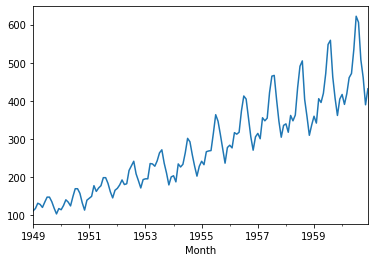

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

# 月毎の旅客機の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
content = pd.read_csv(io.StringIO(stream.decode('utf-8')))
df_content = content.copy()
df_content['Month'] = pd.to_datetime(df_content['Month'], infer_datetime_format=True)
y = pd.Series(df_content['#Passengers'].values, index=df_content['Month'])
y = y.astype('f')
y.plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

y120 = y[120:]

p, d, q, sp, sd, sq = 2, 1, 2, 1, 1, 1
seasonal = 12

result = SARIMAX(y120, order)